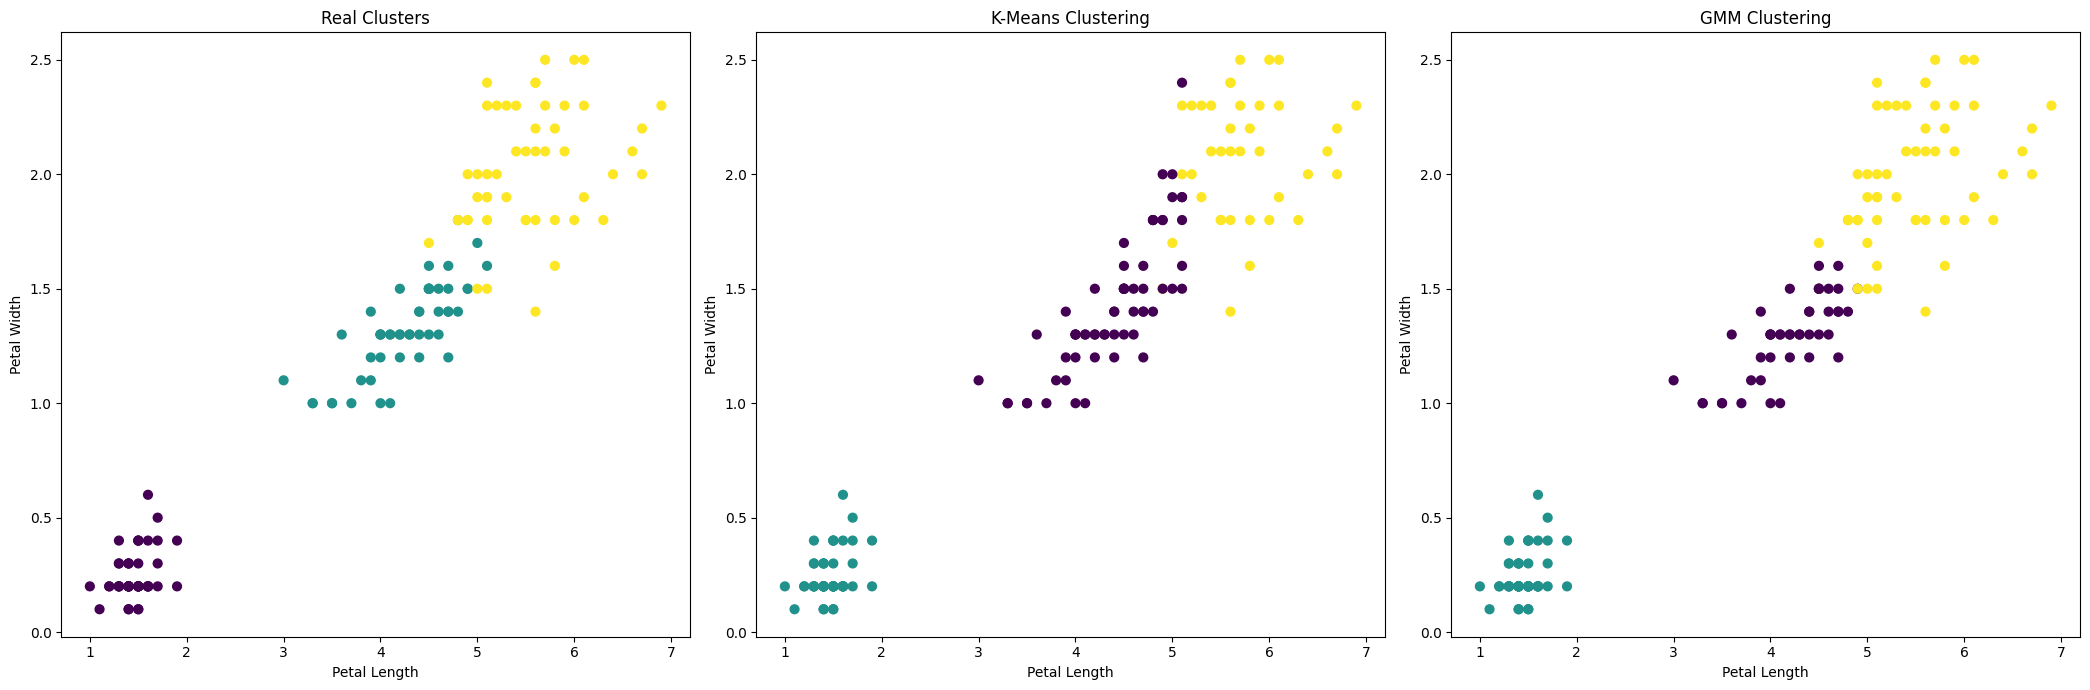

Kmeans accuracy:  0.24
Kmeans Confusion Matrix:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
GMM accuracy:  0.3333333333333333
GMM Confusion Matrix:  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm

iris = load_iris()
X = pd.DataFrame(iris.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(iris.target, columns=['Targets'])

kmeans_model = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_model.fit(X)
kmeans_labels = kmeans_model.labels_

plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=y['Targets'], cmap='viridis', s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

plt.subplot(1, 3, 2)
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=kmeans_labels, cmap='viridis', s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

scaler = StandardScaler() 
scaler.fit(X)
X_scaled = scaler.transform(X)
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)

plt.subplot(1, 3, 3)
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=gmm_labels, cmap='viridis', s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

print("Kmeans accuracy: ",sm.accuracy_score(y,kmeans_labels))
print("Kmeans Confusion Matrix: ",sm.confusion_matrix(y,kmeans_labels))
print("GMM accuracy: ",sm.accuracy_score(y,gmm_labels))
print("GMM Confusion Matrix: ",sm.confusion_matrix(y,gmm_labels))